# ***IMPORTING LIBRARIES***

LIBRARIES:

1. Library **pandas** will be required to work with data in tabular representation.
2. Library **numpy** will be required to round the data in the correlation matrix.
3. Library **missingno** will be required to visualize missing values in the data.
4. Library **matplotlib**, **seaborn**, **plotly** required for data visualization.
5. Library **scipy** will be required to test hypotheses.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px
from scipy.stats import*

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# ***DATA DESCRIPTION AND DATA CLEANING***

- Data Types

In [2]:
# reading Data 
student_Performance = pd.read_csv('StudentPerformanceFactors.csv')
student_Performance.sample(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
857,23,78,Medium,Medium,Yes,10,74,Low,Yes,3,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,67
3530,29,93,Low,Medium,Yes,9,54,Medium,No,4,Low,High,Public,Positive,3,No,High School,Near,Male,71
1622,26,97,Medium,Low,No,5,79,High,Yes,2,Low,Low,Private,Positive,3,No,High School,Near,Female,71
5257,16,86,Medium,Medium,No,6,98,High,Yes,1,Low,Medium,Public,Neutral,3,No,Postgraduate,Near,Male,68
6476,26,87,Medium,High,No,5,70,Low,Yes,1,Low,Medium,Private,Positive,2,No,High School,Near,Female,70


In [3]:
# the dimension of the data
print(f'Data contain {student_Performance.shape[0]} records and {student_Performance.shape[1]} columns.')

Data contain 6607 records and 20 columns.


In [4]:
# deduce data types
student_Performance.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [5]:
# Change the data type 1
col_to_conv = ['Parental_Involvement','Access_to_Resources' ,'Motivation_Level',
               'Family_Income','Teacher_Quality' ,'Peer_Influence',
               'Parental_Education_Level','Distance_from_Home','Gender']

student_Performance[col_to_conv] = student_Performance[col_to_conv].astype('category') 


# student_Performance[col_to_conv] = student_Performance[col_to_conv].apply(lambda x : x.astype('category)) -> just play with you

- Descriptive Statistics


In [6]:
# numeric columns
numric_col = student_Performance.select_dtypes(include=['int']).columns

numric_col

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [7]:
# Desc Stat 
desc_stat = student_Performance.describe()

fig = px.imshow(desc_stat,text_auto=True,title='Descriptive Statistics')
fig.update_layout(width = 1000, height = 800,title_font_size = 20 ,font_size= 14)

<p align="left">
  <img src="Px plots\plot1.png">
  <br>
</p>  

- Missing values


In [8]:
# check the missing values
for col in student_Performance.columns:
    pct_missing = student_Performance[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')
    

Hours_Studied - 0.0%
Attendance - 0.0%
Parental_Involvement - 0.0%
Access_to_Resources - 0.0%
Extracurricular_Activities - 0.0%
Sleep_Hours - 0.0%
Previous_Scores - 0.0%
Motivation_Level - 0.0%
Internet_Access - 0.0%
Tutoring_Sessions - 0.0%
Family_Income - 0.0%
Teacher_Quality - 1.2%
School_Type - 0.0%
Peer_Influence - 0.0%
Physical_Activity - 0.0%
Learning_Disabilities - 0.0%
Parental_Education_Level - 1.4%
Distance_from_Home - 1.0%
Gender - 0.0%
Exam_Score - 0.0%


<Axes: >

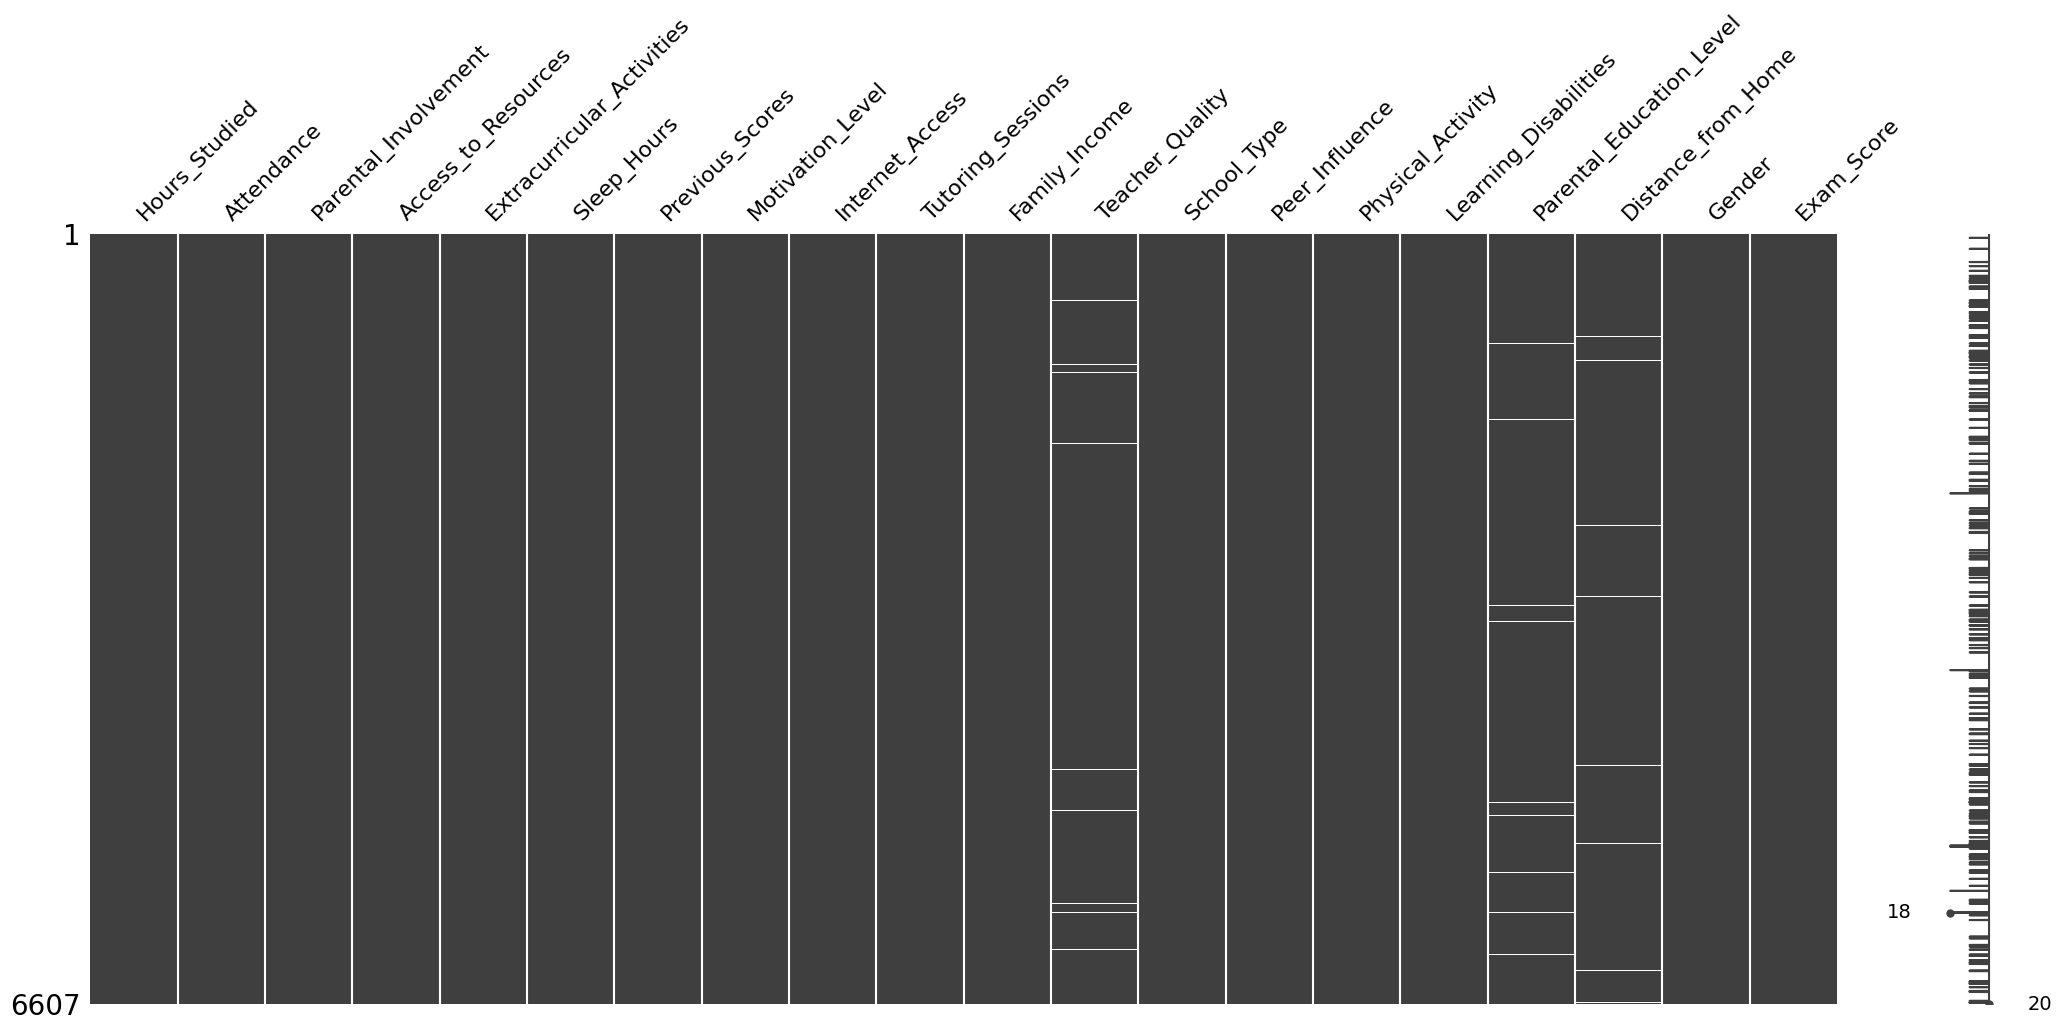

In [9]:
# matrix of missing values
missingno.matrix(student_Performance,fontsize = 16)

In [10]:
# deal with missing values
missing_col = ['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality']

for col in missing_col:
    mode_value = student_Performance[col].mode()[0]
    student_Performance[col] = student_Performance[col].fillna(mode_value)


In [11]:
# check the missing values after dealing with it 
for col in student_Performance.columns:
    pct_missing = student_Performance[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

Hours_Studied - 0.0%
Attendance - 0.0%
Parental_Involvement - 0.0%
Access_to_Resources - 0.0%
Extracurricular_Activities - 0.0%
Sleep_Hours - 0.0%
Previous_Scores - 0.0%
Motivation_Level - 0.0%
Internet_Access - 0.0%
Tutoring_Sessions - 0.0%
Family_Income - 0.0%
Teacher_Quality - 0.0%
School_Type - 0.0%
Peer_Influence - 0.0%
Physical_Activity - 0.0%
Learning_Disabilities - 0.0%
Parental_Education_Level - 0.0%
Distance_from_Home - 0.0%
Gender - 0.0%
Exam_Score - 0.0%


- Duplicates

In [12]:
# duplicates in the columns
duplicate_rows = student_Performance[student_Performance.duplicated(keep=False)]

duplicate_rows_sorted = duplicate_rows.sort_values(by=list(student_Performance.columns))

duplicate_rows_sorted.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


- Capitalizing Categorical Data

In [13]:

categorical_cols = ['Parental_Involvement','Access_to_Resources' ,'Motivation_Level',
               'Family_Income','Teacher_Quality' ,'Peer_Influence',
               'Parental_Education_Level','Distance_from_Home','Gender']

for col in categorical_cols:
    student_Performance[col] = student_Performance[col].str.strip().str.capitalize()


In [14]:
for col in categorical_cols :
    print(f'{col} : {student_Performance[col].unique()}')

Parental_Involvement : ['Low' 'Medium' 'High']
Access_to_Resources : ['High' 'Medium' 'Low']
Motivation_Level : ['Low' 'Medium' 'High']
Family_Income : ['Low' 'Medium' 'High']
Teacher_Quality : ['Medium' 'High' 'Low']
Peer_Influence : ['Positive' 'Negative' 'Neutral']
Parental_Education_Level : ['High school' 'College' 'Postgraduate']
Distance_from_Home : ['Near' 'Moderate' 'Far']
Gender : ['Male' 'Female']


# ***Visualization Data***

In [15]:
x1 = student_Performance['Exam_Score'].tolist()   
x2 = student_Performance['Previous_Scores'].tolist()  
x3 = student_Performance['Hours_Studied'].tolist() 
group_labels = ['Exam Score', 'Previous Scores']

colors = ['LightSalmon', 'DarkSalmon']

fig = ff.create_distplot(
    [x1,x2],
    group_labels,
    bin_size=.5,
    curve_type='normal',colors= colors
)

fig.update_layout(title_text='Distribution of Exam Scores and Previous Scores',font=dict(family='Arial', size=14, color='black'),width = 1200,height =600)


fig.show()
 

<p align="left">
  <img src="Px plots\plot2.png">
  <br>
</p>  

In [16]:
x3 = student_Performance['Hours_Studied'].tolist() 
group_label = ['Hours Studied']


color = ['Salmon']

fig = ff.create_distplot(
    [x3],
    group_label,
    bin_size=.5,
    curve_type='normal',colors= color
)

fig.update_layout(title_text='Distribution of Hours Studied ',font=dict(family='Arial', size=14, color='black'),width = 1200,height =600)

<p align="left">
  <img src="Px plots\plot3.png">
  <br>
</p>  

In [17]:
x4 = student_Performance['Attendance'].tolist() 
group_label = ['Attendance']


color = ['Salmon']

fig = ff.create_distplot(
    [x4],
    group_label,
    bin_size=.5,
    curve_type='normal',colors= color
)

fig.update_layout(title_text='Distribution of Attendance ',font=dict(family='Arial', size=14, color='black'),width = 1200,height =600)

<p align="left">
  <img src="Px plots\plot4.png">
  <br>
</p>  

In [18]:
fig_1 = make_subplots(rows=1,cols=3,subplot_titles= (
    'Impact of Study Hours on Exam Performance','Impact of Attendance on Exam Performance','Impact of Sleep Hours on Exam Performance'))

fig_1.add_trace(go.Scattergl(
    x = student_Performance['Hours_Studied'],
    y = student_Performance['Exam_Score'],
    mode= 'markers',
    name = 'Hours Studied',
    marker_color = 'salmon'),
    row=1,col = 1)


fig_1.add_trace(go.Scattergl(
    x = student_Performance['Attendance'],
    y = student_Performance['Exam_Score'],
    mode= 'markers',
    name = 'Attrndance',
    marker_color = 'salmon'),            
    row=1,col=2)

fig_1.add_trace(go.Scatter(
    x=student_Performance['Sleep_Hours'],
    y=student_Performance['Exam_Score'],
    mode='markers',
    name = 'Sleep Hours',
    marker_color = 'salmon'),
    row=1,col=3)


fig_1.update_layout(
    template = 'simple_white',
    showlegend = False,
    font = dict(family = 'Arial',size = 14 ,color = 'black')
)



fig_1.update_xaxes(title_text = 'Hours Studied',row=1,col=1)
fig_1.update_yaxes(title_text = 'Exam Score' ,row=1,col =1)

fig_1.update_xaxes(title_text = 'Attendance' ,row=1,col=2)
fig_1.update_yaxes(title_text = 'Exam Score' ,row=1,col =1)

fig_1.update_xaxes(title_text = 'Sleep Hours' ,row=1,col=3)
fig_1.update_yaxes(title_text = 'Exam Score' ,row=1,col =1)




<p align="left">
  <img src="Px plots\plot5.png">
  <br>
</p>  

In [19]:
fig2 = make_subplots(rows=1,cols=2,subplot_titles=("Parent Support and Exam Score","Family Income and Exam Score"))

fig2.add_trace(go.Box(
    x=student_Performance['Parental_Involvement'],
    y=student_Performance['Exam_Score']
),row=1,col=1)

fig2.add_trace(go.Box(
    x=student_Performance['Family_Income'],
    y=student_Performance['Exam_Score']
),row=1,col=2)


fig2.update_xaxes(title_text = 'Parental Involvement',row = 1,col=1)
fig2.update_yaxes(title_text = 'Exam Score',row = 1,col=1)

fig2.update_xaxes(title_text = 'Family_Income',row = 1,col=2)
fig2.update_yaxes(title_text = 'Exam Score',row = 1,col=1)

fig2.update_traces(marker_color = 'salmon')

fig2.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=14, 
                              color='black'),width = 1200,height =600)


<p align="left">
  <img src="Px plots\plot6.png">
  <br>
</p>  

In [20]:
fig_2 = make_subplots(rows=1,cols=3,subplot_titles=('Study Hours by School Type','Exam Scores by Peer Influence','Study Hours by Extracurricular Activities'))

fig_2.add_trace(go.Bar(
    x=student_Performance['School_Type'],
    y= student_Performance['Hours_Studied'],
    name='School Type'),
    row = 1 , col = 1)


fig_2.add_trace(go.Bar(
    x=student_Performance['Peer_Influence'],
    y=student_Performance['Exam_Score'],
    name = 'Peer Influence'),
    row= 1 ,col =2)


fig_2.add_trace(go.Bar(
    x=student_Performance['Extracurricular_Activities'],
    y=student_Performance['Hours_Studied'],
    name='Extracurricular Activities'
),row=1,col=3)


fig_2.update_traces(marker_line_color = 'salmon', marker_line_width = 1)

fig_2.update_layout(
    showlegend =False,
    plot_bgcolor = 'rgba(0,0,0,0)',
    font = dict(family='Arial',size= 14,color='black'),
    width = 1200,height = 600 
)


fig_2.update_xaxes(title_text = 'School Type',row=1,col=1)
fig_2.update_yaxes(title_text = 'Hours Studied',row=1,col=1)

fig_2.update_xaxes(title_text = 'Peer Influence' ,row=1,col=2)
fig_2.update_yaxes(title_text = 'Exam Score',row = 1 ,col=2)

fig_2.update_xaxes(title_text = 'Extracurricular_Activities',row=1,col=3)
fig_2.update_yaxes(title_text = 'Hours Studied',row =1 ,col=3)

<p align="left">
  <img src="Px plots\plot7.png">
  <br>
</p>  

In [21]:
fig_3 = make_subplots(rows=1,cols=2,subplot_titles=('Impact of Teacher Quality on Exam Performance','Effect of Parent Education on Study Time'))
fig_3.add_trace(go.Violin(
        x=student_Performance['Teacher_Quality'],  
        y=student_Performance['Exam_Score'],
        name='Teacher Quality',
        box_visible=False,
        meanline_visible=False,
        marker_color='salmon'  
    ),row=1, col=1)

 
fig_3.add_trace(go.Violin(
        x=student_Performance['Parental_Education_Level'],  
        y=student_Performance['Hours_Studied'],
        name='Parent Education',
        box_visible=False,
        meanline_visible=False,
        marker_color='salmon'  
    ),row=1, col=2)

fig_3.update_traces(
    marker_line_color='salmon',   
    marker_line_width=1
)

fig_3.update_layout(
    showlegend=False,
    font=dict(family='Arial', size=14, color='black') ,
    width = 1200,height = 600 
)


fig_3.update_xaxes(title_text='Teacher Quality', row=1, col=1)
fig_3.update_yaxes(title_text='Exam Score', row=1, col=1)

fig_3.update_xaxes(title_text='Parent Education', row=1, col=2)
fig_3.update_yaxes(title_text='Hours Studied', row=1, col=2)


fig_3.show()


<p align="left">
  <img src="Px plots\plot8.png">
  <br>
</p>  

In [22]:
def create_summary_tables(cols):
    avg_columns = ['Hours_Studied', 'Exam_Score', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Tutoring_Sessions']
    
    for col in cols:
        table = student_Performance.groupby(col)[avg_columns].mean().reset_index().round(2)
        
        fig = go.Figure()
        
        fig.add_trace(go.Table(
            columnorder=list(range(1, len(table.columns) + 1)),  
            columnwidth=[100] + [50] * (len(table.columns) - 1),
            header=dict(
                values=table.columns,
                line_color = 'darkslategray',
                fill_color = 'salmon',
                height=30
            ),
            cells=dict(
                values=[table[col] for col in table.columns],
                line_color='darkslategray', 
                fill_color='White' 
            )
        ))
        
        fig.update_layout(
           showlegend = False,
           title_text = f'Stats by {col}',
           title_font_size = 16,
           title_font_family = 'Arial',
           title_x=0.5,
           font = dict(size=12,
           color='black'
        ),width = 1000,height = 400)
        
        fig.show()


cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
        'Teacher_Quality', 'School_Type', 'Learning_Disabilities', 'Gender']

create_summary_tables(cols)



<p align="left">
  <img src="Px plots\stats1.png">
  <br>
</p>  

<p align="left">
  <img src="Px plots\stats2.png">
  <br>
</p>  

<p align="left">
  <img src="Px plots\stats3.png">
  <br>
</p>  

<p align="left">
  <img src="Px plots\stats4.png">
  <br>
</p>  

<p align="left">
  <img src="Px plots\stats5.png">
  <br>
</p>  

<p align="left">
  <img src="Px plots\stats6.png">
  <br>
</p>  

<p align="left">
  <img src="Px plots\stats7.png">
  <br>
</p>  

---

# ***Test Hypotheses***


- ***Does the exam score follow a normal curve?***


- **H₀**: The data follows a normal distribution.
- **H₁**: The data does not follow a normal distribution.


In [23]:
alpha = 0.05

stat ,p_value = ks_1samp(student_Performance['Exam_Score'],norm.cdf,args=(student_Performance['Exam_Score'].mean(),student_Performance['Exam_Score'].std()))

print('Statistic:',f'{stat:.3f}')
print('P-value:',f'{p_value:.20f}')

if p_value < alpha:
    print('Reject H0: The data is not normally distributed')
else:
    print('Accept H0: The data is normally distributed')

Statistic: 0.082
P-value: 0.00000000000000000000
Reject H0: The data is not normally distributed


- ***Do study hours affect exam scores?***


- **H₀**: Study hours don’t affect exam scores.
- **H₁**: Study hours do affect exam scores.

In [24]:
corr , p_value = spearmanr(student_Performance['Hours_Studied'] , student_Performance['Exam_Score'])

print('Correlation:', f'{corr:.3f}')
print('P-value:', f'{p_value:.20f}')

if p_value < alpha:
    print('Reject  H0: There is a correlation between study hours and exam scores')
else:
    print('Accept H0: There is no correlation between study hours and exam scores')


Correlation: 0.481
P-value: 0.00000000000000000000
Reject  H0: There is a correlation between study hours and exam scores


- ***Is there a difference in exam scores between males and females?*** 

- **H₀**: Exam scores are the same for males and females.
- **H₁**: Exam scores are different for males and females.

In [25]:
student_Performance['Gender'] = student_Performance['Gender'].map({'Male': 0, 'Female': 1})

male_scores = student_Performance[student_Performance['Gender'] == 0]['Exam_Score']
female_scores = student_Performance[student_Performance['Gender']  == 1]['Exam_Score']

stat, p_value = mannwhitneyu(male_scores, female_scores)

print('Statistic', f'{stat:.3f}')
print('P_value', f'{p_value:.20f}')

if p_value < alpha:
    print('Reject H0: There is a statistically significant difference between males and females in exam scores')
else:
    print('Accept H0: There is no a statistically significant difference between males and females in exam scores')



Statistic 5372067.500
P_value 0.54814429051116309033
Accept H0: There is no a statistically significant difference between males and females in exam scores


 - ***Does peer pressure have a real impact on exam grades?***

- **H₀**: Peer pressure does not affect exam grades.
- **H₁**: Peer pressure does affect exam grades

In [26]:
student_Performance['Peer_Influence'] = student_Performance['Peer_Influence'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

positive_influence = student_Performance[student_Performance['Peer_Influence'] == 1]['Exam_Score']
neutral_influence = student_Performance[student_Performance['Peer_Influence'] == 0]['Exam_Score']
negative_influence = student_Performance[student_Performance['Peer_Influence'] == -1]['Exam_Score']

stat , p_value = kruskal(positive_influence, neutral_influence, negative_influence)

print('Statistic:', f'{stat:.3f}')
print('P-value:', f'{p_value:.20f}')

if p_value < 0.05:
    print('Reject H0: There is a statistically significant relationship between peer influence and exam scores.')
else:
    print('Accept H0: There is no statistically significant relationship between peer influence and exam scores.')



Statistic: 84.991
P-value: 0.00000000000000000035
Reject H0: There is a statistically significant relationship between peer influence and exam scores.


- ***Does parents' education affect exam scores?***

- **H₀**: Parents' education does not affect exam scores.
- **H₁**: Parents' education does affect exam scores.

In [27]:
hs = student_Performance[student_Performance['Parental_Education_Level'] == 'High school']['Exam_Score'].tolist()
cl = student_Performance[student_Performance['Parental_Education_Level'] == 'College']['Exam_Score'].tolist()
pg = student_Performance[student_Performance['Parental_Education_Level'] == 'Postgraduate']['Exam_Score'].tolist()

stat, p_value = kruskal(hs, cl, pg)

print(f"Statistic: {stat:.3f}")
print(f"p_value: {p_value:.20f}")

if p_value < alpha:
    print("Reject H0: There is a statistically significant relationship between parental education level and exam score.")
else:
    print("Accept H0: There is no statistically significant relationship between parental education level and exam score.")




Statistic: 93.241
p_value: 0.00000000000000000001
Reject H0: There is a statistically significant relationship between parental education level and exam score.


---

***Thanks for checking this out. Any feedback would be really appreciated. If you liked the notebook, feel free to leave a vote.***